In [191]:
import torch 
import dgl
import networkx as nx
dgl.__version__

'0.5.0'

In [192]:
u,v=torch.tensor([0,0,0,1]),torch.tensor([1,2,3,3])
g=dgl.graph((u,v))
print(type(g))

<class 'dgl.heterograph.DGLHeteroGraph'>


In [193]:
print(g.nodes())

tensor([0, 1, 2, 3])


In [194]:
print(g.edges())

(tensor([0, 0, 0, 1]), tensor([1, 2, 3, 3]))


In [195]:
print(g.edges(form='all'))

(tensor([0, 0, 0, 1]), tensor([1, 2, 3, 3]), tensor([0, 1, 2, 3]))


In [196]:
g=dgl.graph((u,v),num_nodes=8)

In [197]:
u,v=torch.tensor([0,0,0,1],dtype=torch.int64),torch.tensor([1,2,3,3],dtype=torch.int64)
g=dgl.graph((u,v))

In [198]:
dgl.__version__

'0.5.0'

In [199]:
type(g)

dgl.heterograph.DGLHeteroGraph

In [200]:
edges = torch.tensor([2, 5, 3]), torch.tensor([3, 5, 0]) 
g64=dgl.graph(edges,idtype=torch.int64)
g64.ntypes,g64.etypes

(['_N'], ['_E'])

In [201]:
g.canonical_etypes

[('_N', '_E', '_N')]

In [202]:
# 同构图
hg=dgl.heterograph({('node_type', 'edge_type', 'node_type'): (u, v)})
hg.canonical_etypes

[('node_type', 'edge_type', 'node_type')]

In [203]:
# 二分图
bg=dgl.heterograph({('source_type', 'edge_type', 'destination_type'): (u, v)})
bg.canonical_etypes,bg

([('source_type', 'edge_type', 'destination_type')],
 Graph(num_nodes={'destination_type': 4, 'source_type': 2},
       num_edges={('source_type', 'edge_type', 'destination_type'): 4},
       metagraph=[('source_type', 'destination_type', 'edge_type')]))

In [211]:
graph_data = {
   ('drug', 'interacts', 'drug'): (torch.tensor([0, 1]), torch.tensor([1, 2])),
   ('drug', 'interacts', 'gene'): (torch.tensor([0, 1]), torch.tensor([2, 3])),
   ('drug', 'treats', 'disease'): (torch.tensor([1]), torch.tensor([2]))
}
g = dgl.heterograph(graph_data)
g

Graph(num_nodes={'disease': 3, 'drug': 3, 'gene': 4},
      num_edges={('drug', 'interacts', 'drug'): 2, ('drug', 'interacts', 'gene'): 2, ('drug', 'treats', 'disease'): 1},
      metagraph=[('drug', 'drug', 'interacts'), ('drug', 'gene', 'interacts'), ('drug', 'disease', 'treats')])

In [205]:
g.__class__.__dict__

mappingproxy({'__module__': 'dgl.heterograph',
              '__doc__': 'Class for storing graph structure and node/edge feature data.\n\n    There are a few ways to create create a DGLGraph:\n\n    * To create a homogeneous graph from Tensor data, use :func:`dgl.graph`.\n    * To create a heterogeneous graph from Tensor data, use :func:`dgl.heterograph`.\n    * To create a graph from other data sources, use ``dgl.*`` create ops. See\n      :ref:`api-graph-create-ops`.\n\n    Read the user guide chapter :ref:`guide-graph` for an in-depth explanation about its\n    usage.\n    ',
              'is_block': False,
              '__init__': <function dgl.heterograph.DGLHeteroGraph.__init__(self, gidx=[], ntypes=['_U'], etypes=['_V'], node_frames=None, edge_frames=None, **deprecate_kwargs)>,
              '_init': <function dgl.heterograph.DGLHeteroGraph._init(self, gidx, ntypes, etypes, node_frames, edge_frames)>,
              '__setstate__': <function dgl.heterograph.DGLHeteroGraph.__set

In [206]:
g=dgl.graph((u,v))

In [207]:
g.__class__.__dict__

mappingproxy({'__module__': 'dgl.heterograph',
              '__doc__': 'Class for storing graph structure and node/edge feature data.\n\n    There are a few ways to create create a DGLGraph:\n\n    * To create a homogeneous graph from Tensor data, use :func:`dgl.graph`.\n    * To create a heterogeneous graph from Tensor data, use :func:`dgl.heterograph`.\n    * To create a graph from other data sources, use ``dgl.*`` create ops. See\n      :ref:`api-graph-create-ops`.\n\n    Read the user guide chapter :ref:`guide-graph` for an in-depth explanation about its\n    usage.\n    ',
              'is_block': False,
              '__init__': <function dgl.heterograph.DGLHeteroGraph.__init__(self, gidx=[], ntypes=['_U'], etypes=['_V'], node_frames=None, edge_frames=None, **deprecate_kwargs)>,
              '_init': <function dgl.heterograph.DGLHeteroGraph._init(self, gidx, ntypes, etypes, node_frames, edge_frames)>,
              '__setstate__': <function dgl.heterograph.DGLHeteroGraph.__set

In [208]:
g.metagraph

<bound method DGLHeteroGraph.metagraph of Graph(num_nodes=4, num_edges=4,
      ndata_schemes={}
      edata_schemes={})>

In [209]:
g.number_of_nodes()

4

In [212]:
g.get_ntype_id('disease')

0

In [213]:
g.srcnodes('gene')

tensor([0, 1, 2, 3])

In [214]:
g.dstnodes('gene')

tensor([0, 1, 2, 3])

In [215]:
g.nodes('disease')

tensor([0, 1, 2])

In [216]:
g.nodes['drug'].data['hv']=torch.ones(3,1)
g.nodes['drug'].data['hv']

tensor([[1.],
        [1.],
        [1.]])

In [217]:
g.edges['treats'].data['he'] = torch.zeros(1, 1)
g.edges['treats'].data['he']

tensor([[0.]])

In [218]:
g.edges['treats'].data

{'he': tensor([[0.]])}

In [219]:
g.nodes['gene'].data

{}

In [220]:
g = dgl.heterograph({
   ('drug', 'interacts', 'drug'): (torch.tensor([0, 1]), torch.tensor([1, 2])),
   ('drug', 'is similar', 'drug'): (torch.tensor([0, 1]), torch.tensor([2, 3]))
})
g.nodes()
g.ndata['hv']=torch.ones(4,1)

In [221]:
g.nodes['drug']

NodeSpace(data={'hv': tensor([[1.],
        [1.],
        [1.],
        [1.]])})

In [222]:
g.srctypes

['drug']

In [223]:
# 从磁盘加载异构图

In [224]:
g = dgl.heterograph({
   ('drug', 'interacts', 'drug'): (torch.tensor([0, 1]), torch.tensor([1, 2])),
   ('drug', 'interacts', 'gene'): (torch.tensor([0, 1]), torch.tensor([2, 3])),
   ('drug', 'treats', 'disease'): (torch.tensor([1]), torch.tensor([2]))
})

In [225]:
g.nodes['drug'].data['hv'] = torch.ones(3, 1)

In [226]:
eg = g.edge_type_subgraph([('drug', 'interacts', 'drug'),('drug', 'treats', 'disease')])

In [227]:
eg

Graph(num_nodes={'disease': 3, 'drug': 3},
      num_edges={('drug', 'interacts', 'drug'): 2, ('drug', 'treats', 'disease'): 1},
      metagraph=[('drug', 'drug', 'interacts'), ('drug', 'disease', 'treats')])

In [228]:
eg.nodes['drug'].data['hv']

tensor([[1.],
        [1.],
        [1.]])

In [229]:
# 将异构图转化为同构图
g = dgl.heterograph({
   ('drug', 'interacts', 'drug'): (torch.tensor([0, 1]), torch.tensor([1, 2])),
   ('drug', 'treats', 'disease'): (torch.tensor([1]), torch.tensor([2]))})
g.nodes['drug'].data['hv'] = torch.zeros(3, 1)
g.nodes['disease'].data['hv'] = torch.ones(3, 1)
g.edges['interacts'].data['he'] = torch.zeros(2, 1)
g.edges['treats'].data['he'] = torch.zeros(1, 2)

In [233]:
dgl.sum_nodes(g)

TypeError: sum_nodes() missing 1 required positional argument: 'feat'

In [234]:
dgl.DGLGraph.__dict__

mappingproxy({'__module__': 'dgl.heterograph',
              '__doc__': 'Class for storing graph structure and node/edge feature data.\n\n    There are a few ways to create create a DGLGraph:\n\n    * To create a homogeneous graph from Tensor data, use :func:`dgl.graph`.\n    * To create a heterogeneous graph from Tensor data, use :func:`dgl.heterograph`.\n    * To create a graph from other data sources, use ``dgl.*`` create ops. See\n      :ref:`api-graph-create-ops`.\n\n    Read the user guide chapter :ref:`guide-graph` for an in-depth explanation about its\n    usage.\n    ',
              'is_block': False,
              '__init__': <function dgl.heterograph.DGLHeteroGraph.__init__(self, gidx=[], ntypes=['_U'], etypes=['_V'], node_frames=None, edge_frames=None, **deprecate_kwargs)>,
              '_init': <function dgl.heterograph.DGLHeteroGraph._init(self, gidx, ntypes, etypes, node_frames, edge_frames)>,
              '__setstate__': <function dgl.heterograph.DGLHeteroGraph.__set

In [235]:
# Source nodes for edges (2, 1), (3, 2), (4, 3)
src_ids = torch.tensor([2, 3, 4])
# Destination nodes for edges (2, 1), (3, 2), (4, 3)
dst_ids = torch.tensor([1, 2, 3])
g = dgl.graph((src_ids, dst_ids))
g = dgl.graph((src_ids, dst_ids), num_nodes=100)
type(g)

dgl.heterograph.DGLHeteroGraph

In [236]:
g = dgl.graph((src_ids, dst_ids), idtype=torch.int32, device='cuda:0')

In [237]:
type(g)

dgl.heterograph.DGLHeteroGraph

In [238]:
dgl.DGLGraph.__dict__

mappingproxy({'__module__': 'dgl.heterograph',
              '__doc__': 'Class for storing graph structure and node/edge feature data.\n\n    There are a few ways to create create a DGLGraph:\n\n    * To create a homogeneous graph from Tensor data, use :func:`dgl.graph`.\n    * To create a heterogeneous graph from Tensor data, use :func:`dgl.heterograph`.\n    * To create a graph from other data sources, use ``dgl.*`` create ops. See\n      :ref:`api-graph-create-ops`.\n\n    Read the user guide chapter :ref:`guide-graph` for an in-depth explanation about its\n    usage.\n    ',
              'is_block': False,
              '__init__': <function dgl.heterograph.DGLHeteroGraph.__init__(self, gidx=[], ntypes=['_U'], etypes=['_V'], node_frames=None, edge_frames=None, **deprecate_kwargs)>,
              '_init': <function dgl.heterograph.DGLHeteroGraph._init(self, gidx, ntypes, etypes, node_frames, edge_frames)>,
              '__setstate__': <function dgl.heterograph.DGLHeteroGraph.__set

In [239]:
import torch as th
u, v = th.tensor([0, 0, 0, 1]), th.tensor([1, 2, 3, 3])
g = dgl.graph((u, v))
print(g) 

Graph(num_nodes=4, num_edges=4,
      ndata_schemes={}
      edata_schemes={})


In [240]:
print(g.nodes())

tensor([0, 1, 2, 3])


In [241]:
print(g.edges())

(tensor([0, 0, 0, 1]), tensor([1, 2, 3, 3]))


In [242]:
print(g.edges(form='all'))

(tensor([0, 0, 0, 1]), tensor([1, 2, 3, 3]), tensor([0, 1, 2, 3]))


In [243]:
g = dgl.graph((u, v), num_nodes=8)

In [244]:
bg = dgl.to_bidirected(g)

In [245]:
bg.edges()

(tensor([0, 0, 0, 1, 1, 2, 3, 3]), tensor([1, 2, 3, 0, 3, 0, 0, 1]))

In [246]:
edges=th.tensor([2,5,3]),th.tensor([3,5,0])
g64=dgl.graph(edges)
print(g64.idtype)

torch.int64


In [247]:
g32=dgl.graph(edges,idtype=th.int32)
g32.idtype

torch.int32

In [248]:
g64_2=g32.long()
g64_2.idtype

torch.int64

In [249]:
g32_2=g64.int()
g32_2.idtype

torch.int32

In [250]:
g=dgl.graph(([0,0,1,5],[1,2,2,0]))
type(g)

dgl.heterograph.DGLHeteroGraph

In [251]:
g.ndata['x']=th.ones(g.num_nodes(),3)
g.edata['x']=th.ones(g.num_edges(),dtype=th.int32)

In [252]:
g

Graph(num_nodes=6, num_edges=4,
      ndata_schemes={'x': Scheme(shape=(3,), dtype=torch.float32)}
      edata_schemes={'x': Scheme(shape=(), dtype=torch.int32)})

In [253]:
g.ndata['y']=th.randn(g.num_nodes(),5)
g.ndata['x'][[1,3]]
#特征张量使用”行优先”的原则，即每个行切片储存1个节点或1条边的特征

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [254]:
g.edata['x'][th.tensor([0,3])]

tensor([1, 1], dtype=torch.int32)

In [255]:
# 边 0->1, 0->2, 0->3, 1->3
edges = th.tensor([0, 0, 0, 1]), th.tensor([1, 2, 3, 3])
weights = th.tensor([0.1, 0.6, 0.9, 0.7])  # 每条边的权重
g = dgl.graph(edges)
g.edata['w'] = weights  # 将其命名为 'w'
g

Graph(num_nodes=4, num_edges=4,
      ndata_schemes={}
      edata_schemes={'w': Scheme(shape=(), dtype=torch.float32)})

In [256]:
import scipy.sparse as sp

In [257]:
# 稀疏矩阵
spmat = sp.rand(100, 100, density=0.05) # 5%非零项
dgl.from_scipy(spmat)                   # 来自SciPy

Graph(num_nodes=100, num_edges=500,
      ndata_schemes={}
      edata_schemes={})

In [258]:
print(spmat)

  (34, 83)	0.07939921311767872
  (50, 5)	0.6227385627651911
  (87, 82)	0.5553487742207279
  (92, 97)	0.06098421964044476
  (15, 24)	0.49925163914381887
  (54, 64)	0.388647090163485
  (39, 73)	0.7753539913160398
  (14, 92)	0.41355906179960433
  (29, 6)	0.5956792212305867
  (91, 66)	0.9044212992084206
  (17, 77)	0.5728680397455964
  (85, 80)	0.41354825592298705
  (27, 96)	0.254177969334771
  (45, 56)	0.97028093327497
  (72, 10)	0.9183660125262597
  (25, 6)	0.7129011207218053
  (25, 26)	0.7482871429754023
  (43, 78)	0.9584877017716043
  (57, 59)	0.03887762957940866
  (28, 28)	0.31626862964396574
  (32, 69)	0.02490519583322348
  (42, 61)	0.07908657968514843
  (32, 60)	0.35210260209303
  (52, 76)	0.5609684413975489
  (33, 30)	0.8628692600742043
  :	:
  (53, 97)	0.5111141780402435
  (64, 44)	0.37825000140161524
  (95, 9)	0.7507554150024993
  (72, 87)	0.5014528583971822
  (93, 14)	0.9346126360005846
  (22, 32)	0.9594238849106653
  (40, 2)	0.8974940558343383
  (48, 19)	0.9059740286586647
  (73

In [259]:
# networkx 
import networkx as nx
nx_g = nx.path_graph(5) # 一条链路0-1-2-3-4
dgl.from_networkx(nx_g) # 来自NetworkX

Graph(num_nodes=5, num_edges=8,
      ndata_schemes={}
      edata_schemes={})

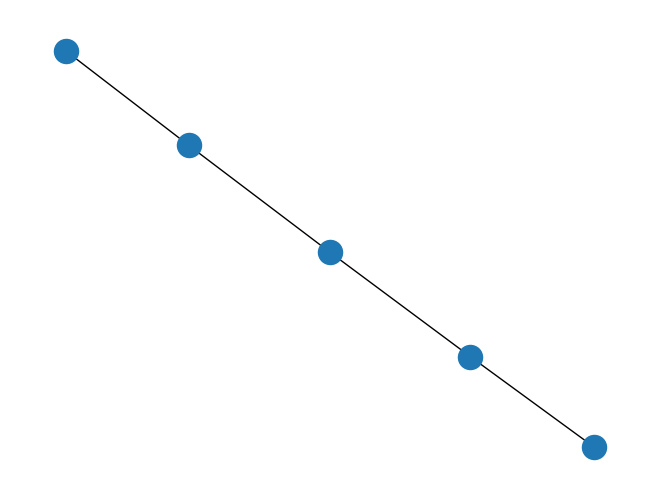

In [260]:
nx.draw(nx_g)

In [261]:
nxg = nx.DiGraph([(2, 1), (1, 2), (2, 3), (0, 0)])
dgl.from_networkx(nxg)

Graph(num_nodes=4, num_edges=4,
      ndata_schemes={}
      edata_schemes={})

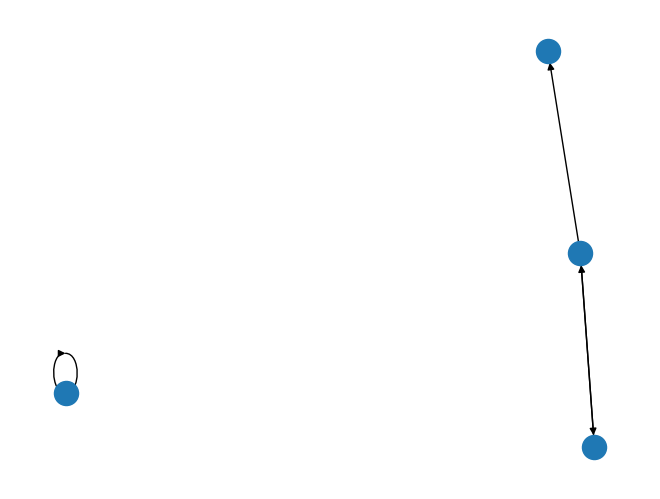

In [262]:
nx.draw(nxg)

In [263]:
# 异构图
graph_data = {
   ('drug', 'interacts', 'drug'): (th.tensor([0, 1]), th.tensor([1, 2])),
   ('drug', 'interacts', 'gene'): (th.tensor([0, 1]), th.tensor([2, 3])),
   ('drug', 'treats', 'disease'): (th.tensor([1]), th.tensor([2]))
}
g = dgl.heterograph(graph_data)
g.ntypes

['disease', 'drug', 'gene']

In [264]:
g.etypes

['interacts', 'interacts', 'treats']

In [265]:
g.canonical_etypes

[('drug', 'interacts', 'drug'),
 ('drug', 'interacts', 'gene'),
 ('drug', 'treats', 'disease')]

In [266]:
# 一个同构图
dgl.heterograph({('node_type', 'edge_type', 'node_type'): (u, v)})
# 一个二分图
dgl.heterograph({('source_type', 'edge_type', 'destination_type'): (u, v)})

Graph(num_nodes={'destination_type': 4, 'source_type': 2},
      num_edges={('source_type', 'edge_type', 'destination_type'): 4},
      metagraph=[('source_type', 'destination_type', 'edge_type')])

In [267]:
g

Graph(num_nodes={'disease': 3, 'drug': 3, 'gene': 4},
      num_edges={('drug', 'interacts', 'drug'): 2, ('drug', 'interacts', 'gene'): 2, ('drug', 'treats', 'disease'): 1},
      metagraph=[('drug', 'drug', 'interacts'), ('drug', 'gene', 'interacts'), ('drug', 'disease', 'treats')])

In [268]:
g.metagraph().edges()

OutMultiEdgeDataView([('drug', 'drug'), ('drug', 'gene'), ('drug', 'disease')])

In [269]:
g.num_nodes()

10

In [270]:
g.num_nodes('drug')

3

In [271]:
g.nodes['drug'].data['hv']=th.ones(3,1)

In [272]:
g.nodes['drug'].data['hv']

tensor([[1.],
        [1.],
        [1.]])

In [273]:
g.edges['treats'].data['he']=th.zeros(1,1)
g.edges['treats'].data['he']

tensor([[0.]])

In [274]:
g = dgl.heterograph({
   ('drug', 'interacts', 'drug'): (th.tensor([0, 1]), th.tensor([1, 2])),
   ('drug', 'is similar', 'drug'): (th.tensor([0, 1]), th.tensor([2, 3]))
})

In [275]:
g.nodes()

tensor([0, 1, 2, 3])

In [276]:
g.ndata['hv']=th.ones(4,1)

In [277]:
g = dgl.heterograph({
   ('drug', 'interacts', 'drug'): (th.tensor([0, 1]), th.tensor([1, 2])),
   ('drug', 'interacts', 'gene'): (th.tensor([0, 1]), th.tensor([2, 3])),
   ('drug', 'treats', 'disease'): (th.tensor([1]), th.tensor([2]))
})

In [278]:
g.nodes['drug'].data['hv'] = th.ones(3, 1)

In [279]:
g

Graph(num_nodes={'disease': 3, 'drug': 3, 'gene': 4},
      num_edges={('drug', 'interacts', 'drug'): 2, ('drug', 'interacts', 'gene'): 2, ('drug', 'treats', 'disease'): 1},
      metagraph=[('drug', 'drug', 'interacts'), ('drug', 'gene', 'interacts'), ('drug', 'disease', 'treats')])

In [280]:
eg = dgl.edge_type_subgraph(g, [('drug', 'interacts', 'drug'),
                                ('drug', 'treats', 'disease')])
eg

Graph(num_nodes={'disease': 3, 'drug': 3},
      num_edges={('drug', 'interacts', 'drug'): 2, ('drug', 'treats', 'disease'): 1},
      metagraph=[('drug', 'drug', 'interacts'), ('drug', 'disease', 'treats')])

In [281]:
eg.nodes['drug'].data['hv']

tensor([[1.],
        [1.],
        [1.]])

In [282]:
g = dgl.heterograph({
   ('drug', 'interacts', 'drug'): (th.tensor([0, 1]), th.tensor([1, 2])),
   ('drug', 'treats', 'disease'): (th.tensor([1]), th.tensor([2]))})

In [283]:
g.nodes['drug'].data['hv'] = th.zeros(3, 1)
g.nodes['disease'].data['hv'] = th.ones(3, 1)
g.edges['interacts'].data['he'] = th.zeros(2, 1)
g.edges['treats'].data['he'] = th.zeros(1, 2)

In [284]:
hg=dgl.to_homogeneous(g)

In [285]:
'hv' in hg.ndata

False

In [286]:
hg = dgl.to_homogeneous(g, edata=['he'])
# 对于要拷贝的特征，DGL假定不同类型的节点或边的需要合并的特征具有相同的大小和数据类型

DGLError: Cannot concatenate column he with shape Scheme(shape=(2,), dtype=torch.float32) and shape Scheme(shape=(1,), dtype=torch.float32)

In [287]:
hg = dgl.to_homogeneous(g, ndata=['hv'])
hg.ndata['hv']

tensor([[1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.]])

In [288]:
dgl.NTYPE

'_TYPE'

In [289]:
g.ntypes

['disease', 'drug']

In [290]:
hg.ndata[dgl.NTYPE]

tensor([0, 0, 0, 1, 1, 1])

In [291]:
hg.ndata[dgl.NID]

tensor([0, 1, 2, 0, 1, 2])

In [292]:
hg.ndata

{'hv': tensor([[1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.]]), '_TYPE': tensor([0, 0, 0, 1, 1, 1]), '_ID': tensor([0, 1, 2, 0, 1, 2])}

In [293]:
hg

Graph(num_nodes=6, num_edges=3,
      ndata_schemes={'hv': Scheme(shape=(1,), dtype=torch.float32), '_TYPE': Scheme(shape=(), dtype=torch.int64), '_ID': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'_TYPE': Scheme(shape=(), dtype=torch.int64), '_ID': Scheme(shape=(), dtype=torch.int64)})

In [294]:
dgl.ETYPE

'_TYPE'

In [295]:
hg.ntypes

['_N']

In [296]:
hg.ndata[dgl.NTYPE]

tensor([0, 0, 0, 1, 1, 1])

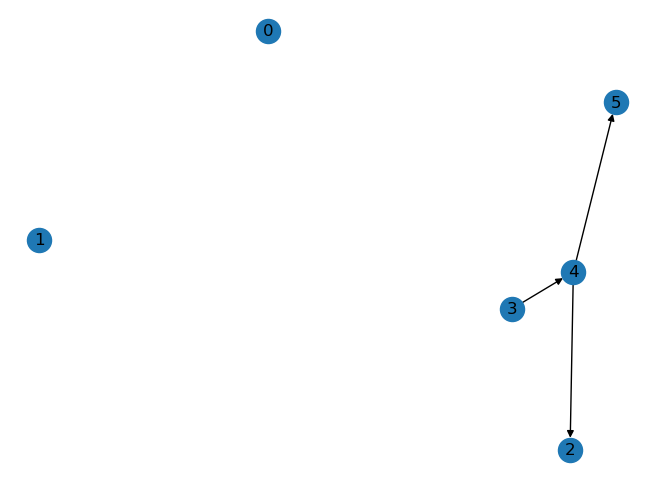

In [297]:
nx.draw(hg.to_networkx(),with_labels=True)

In [298]:
hg.ndata

{'hv': tensor([[1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.]]), '_TYPE': tensor([0, 0, 0, 1, 1, 1]), '_ID': tensor([0, 1, 2, 0, 1, 2])}

In [299]:
hg.ndata[dgl.NID]

tensor([0, 1, 2, 0, 1, 2])

In [300]:
g.etypes

['interacts', 'treats']

In [301]:
hg.edata

{'_TYPE': tensor([0, 0, 1]), '_ID': tensor([0, 1, 0])}

In [302]:
hg.edata[dgl.ETYPE]

tensor([0, 0, 1])

In [303]:
hg.edata[dgl.EID]

tensor([0, 1, 0])

In [304]:
g = dgl.heterograph({
   ('drug', 'interacts', 'drug'): (th.tensor([0, 1]), th.tensor([1, 2])),
   ('drug', 'interacts', 'gene'): (th.tensor([0, 1]), th.tensor([2, 3])),
   ('drug', 'treats', 'disease'): (th.tensor([1]), th.tensor([2]))
})
sub_g = dgl.edge_type_subgraph(g, [('drug', 'interacts', 'drug'),
                                   ('drug', 'interacts', 'gene')])
h_sub_g = dgl.to_homogeneous(sub_g)
h_sub_g

Graph(num_nodes=7, num_edges=4,
      ndata_schemes={'_TYPE': Scheme(shape=(), dtype=torch.int64), '_ID': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'_TYPE': Scheme(shape=(), dtype=torch.int64), '_ID': Scheme(shape=(), dtype=torch.int64)})

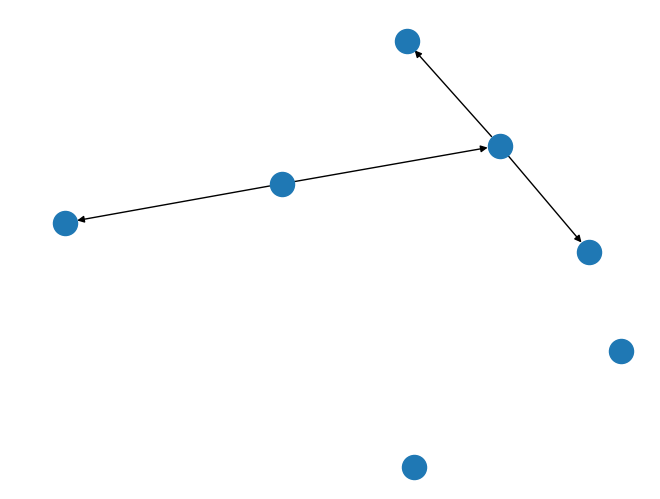

In [305]:
nx.draw(h_sub_g.to_networkx())

In [306]:
u, v = th.tensor([0, 1, 2]), th.tensor([2, 3, 4])
g = dgl.graph((u, v))
g.ndata['x'] = th.randn(5, 3)   # 原始特征在CPU上
g.device

device(type='cpu')

In [307]:
cuda_g = g.to('cuda:0')         # 接受来自后端框架的任何设备对象
cuda_g.device

device(type='cuda', index=0)

In [308]:
cuda_g.ndata['x'].device        # 特征数据也拷贝到了GPU上

device(type='cuda', index=0)

In [309]:
u, v = u.to('cuda:0'), v.to('cuda:0')
g = dgl.graph((u, v))
g.device

device(type='cuda', index=0)

In [310]:
# 使用to或者使用GPU上的张量

In [311]:
cuda_g.in_degrees()

tensor([0, 0, 1, 1, 1], device='cuda:0')

In [312]:
cuda_g.in_edges([2, 2, 4]) # 可以接受非张量类型的参数

(tensor([0, 0, 2], device='cuda:0'), tensor([2, 2, 4], device='cuda:0'))

In [313]:
cuda_g.in_edges(th.tensor([2, 3, 4]).to('cuda:0'))  # 张量类型的参数必须在GPU上

(tensor([0, 1, 2], device='cuda:0'), tensor([2, 3, 4], device='cuda:0'))

In [314]:
cuda_g.ndata['h'] = th.randn(5, 4) 
# gpu cpu 不互通 

DGLError: Cannot assign node feature "h" on device cpu to a graph on device cuda:0. Call DGLGraph.to() to copy the graph to the same device.

In [315]:
import dgl
import torch
import dgl.function as fn
g = dgl.graph(([1, 3, 5, 0, 4, 2, 3, 3, 4, 5], [1, 1, 0, 0, 1, 2, 2, 0, 3, 3]))
g.edata['eid'] = torch.arange(10,dtype=torch.float32)
def reducer(nodes):
    print(nodes.mailbox['eid'])
    return {'n': nodes.mailbox['eid'].sum(1)}

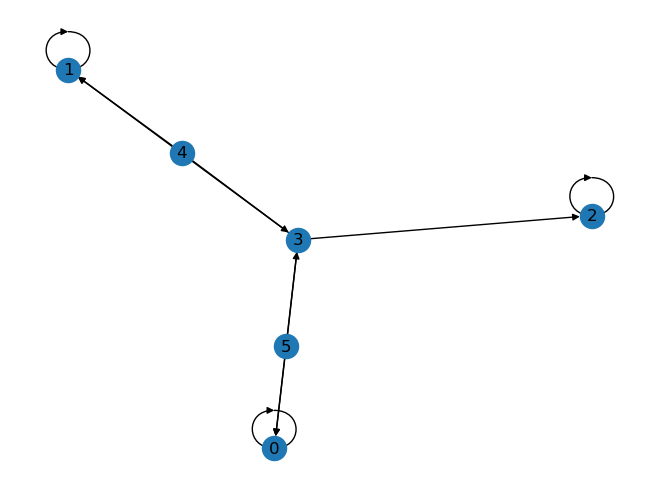

In [316]:
nx.draw(g.to_networkx(),with_labels=True)

In [317]:
g.edata

{'eid': tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])}

In [318]:
g.update_all(fn.copy_e('eid', 'eid'), reducer)

tensor([[5., 6.],
        [8., 9.]])
tensor([[3., 7., 2.],
        [0., 1., 4.]])


In [319]:
g.ndata

{'n': tensor([12.,  5., 11., 17.,  0.,  0.])}

In [320]:
g.edata

{'eid': tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])}

In [321]:
def fn_ns(nodes):
    print(nodes.mailbox)  # 查看一下mailbox
    return {'h': nodes.data['x'] + 1}

In [322]:
def update_all_example(graph):
    # 在graph.ndata['ft']中存储结果
    graph.update_all(fn.u_mul_e('ft', 'a', 'm'),
                     fn.sum('m', 'ft'))
    # 在update_all外调用更新函数
    final_ft = graph.ndata['ft'] * 2
    return final_ft

In [323]:
g.update_all(fn.copy_e('eid','eid'),fn.sum('eid','m'))
g.ndata

{'n': tensor([12.,  5., 11., 17.,  0.,  0.]), 'm': tensor([12.,  5., 11., 17.,  0.,  0.])}

In [324]:
import torch
import torch.nn as nn
node_feat_dim=100
out_dim=30

linear = nn.Parameter(torch.FloatTensor(size=(node_feat_dim * 2, out_dim)))
def concat_message_function(edges):
     return {'cat_feat': torch.cat([edges.src['feat'], edges.dst['feat']], dim=1)}
g.apply_edges(concat_message_function)
g.edata['out'] = g.edata['cat_feat'] @ linear
# 用线性层降维

KeyError: 'feat'

In [ ]:
g.srcdata.__class__.__dict__

mappingproxy({'__module__': 'dgl.view',
              '__doc__': 'The data view class when G.ndata[ntype] is called.',
              '__slots__': ['_graph', '_ntype', '_ntid', '_nodes'],
              '__init__': <function dgl.view.HeteroNodeDataView.__init__(self, graph, ntype, ntid, nodes)>,
              '__getitem__': <function dgl.view.HeteroNodeDataView.__getitem__(self, key)>,
              '__setitem__': <function dgl.view.HeteroNodeDataView.__setitem__(self, key, val)>,
              '__delitem__': <function dgl.view.HeteroNodeDataView.__delitem__(self, key)>,
              '__len__': <function dgl.view.HeteroNodeDataView.__len__(self)>,
              '__iter__': <function dgl.view.HeteroNodeDataView.__iter__(self)>,
              'keys': <function dgl.view.HeteroNodeDataView.keys(self)>,
              'values': <function dgl.view.HeteroNodeDataView.values(self)>,
              '__repr__': <function dgl.view.HeteroNodeDataView.__repr__(self)>,
              '_graph': <member '

In [ ]:
g.srcdata.update({'m':th.tensor([0,0,0,0,0,0])})

In [ ]:
g.srcdata

{'m': tensor([0, 0, 0, 0, 0, 0])}

In [ ]:
import dgl.function as fn

linear_src = nn.Parameter(torch.FloatTensor(size=(node_feat_dim, out_dim)))
linear_dst = nn.Parameter(torch.FloatTensor(size=(node_feat_dim, out_dim)))
out_src = g.ndata['feat'] @ linear_src
out_dst = g.ndata['feat'] @ linear_dst
g.srcdata.update({'out_src': out_src})
g.dstdata.update({'out_dst': out_dst})
g.apply_edges(fn.u_add_v('out_src', 'out_dst', 'out'))
# 高效 内存不用保存高维feat
# 可以使用 u_add_v 优化

In [ ]:
nid = [0, 2, 3, 6, 7, 9]
sg = g.subgraph(nid)
sg.update_all(message_func, reduce_func, apply_node_func)
# 先给出子图 然后在子图上聚合

In [ ]:
g.canonical_etypes

[('_N', '_E', '_N')]

In [325]:
import dgl.function as fn

for c_etype in g.canonical_etypes:
    srctype, etype, dsttype = c_etype
    Wh = self.weight[etype](feat_dict[srctype])
    # 把它存在图中用来做消息传递
    g.nodes[srctype].data['Wh_%s' % etype] = Wh
    # 指定每个关系的消息传递函数：(message_func, reduce_func).
    # 注意结果保存在同一个目标特征“h”，说明聚合是逐类进行的。
    funcs[etype] = (fn.copy_u('Wh_%s' % etype, 'm'), fn.mean('m', 'h'))
# 将每个类型消息聚合的结果相加。
g.multi_update_all(funcs, 'sum')
# 返回更新过的节点特征字典
return {ntype : G.nodes[ntype].data['h'] for ntype in G.ntypes}

NameError: name 'self' is not defined

In [326]:
import torch.nn as nn 
from dgl.utils import expand_as_pair

class SAGEConv(nn.Module):
    def __init__(self,in_feats,out_feats,aggregator_type,
                 bias=True,norm=None,activation=None):
        super(SAGEConv,self).__init__()
        
        self._in_src_feats,self._in_dst_feats=expand_as_pair(in_feats)
        self._out_feats=out_feats
        self._aggre_type=aggregator_type
        self.norm=norm 
        self.activation=activation 
        if aggregator_type not in ['mean', 'pool', 'lstm', 'gcn']:
            raise KeyError('Aggregator type {} not supported.'.format(aggregator_type))
        if aggregator_type == 'pool':
            self.fc_pool = nn.Linear(self._in_src_feats, self._in_src_feats)
        if aggregator_type == 'lstm':
            self.lstm = nn.LSTM(self._in_src_feats, self._in_src_feats, batch_first=True)
        if aggregator_type in ['mean', 'pool', 'lstm']:
            self.fc_self = nn.Linear(self._in_dst_feats, out_feats, bias=bias)
        self.fc_neigh = nn.Linear(self._in_src_feats, out_feats, bias=bias)
        self.reset_parameters()
    
    def reset_parameters(self):
    """重新初始化可学习的参数"""
        gain = nn.init.calculate_gain('relu')
        if self._aggre_type == 'pool':
            nn.init.xavier_uniform_(self.fc_pool.weight, gain=gain)
        if self._aggre_type == 'lstm':
            self.lstm.reset_parameters()
        if self._aggre_type != 'gcn':
            nn.init.xavier_uniform_(self.fc_self.weight, gain=gain)
        nn.init.xavier_uniform_(self.fc_neigh.weight, gain=gain)

In [ ]:
def forward(self, graph, feat):
    with graph.local_scope():
        # 指定图类型，然后根据图类型扩展输入特征
        feat_src, feat_dst = expand_as_pair(feat, graph)

In [330]:
import torch.nn.functional as F 
F.__dict__

{'__name__': 'torch.nn.functional',
 '__doc__': 'Functional interface',
 '__package__': 'torch.nn',
 '__loader__': <_frozen_importlib_external.SourceFileLoader at 0x7f898c0e64f0>,
 '__spec__': ModuleSpec(name='torch.nn.functional', loader=<_frozen_importlib_external.SourceFileLoader object at 0x7f898c0e64f0>, origin='/home/suzhang/anaconda3/envs/gccplnlp/lib/python3.8/site-packages/torch/nn/functional.py'),
 '__file__': '/home/suzhang/anaconda3/envs/gccplnlp/lib/python3.8/site-packages/torch/nn/functional.py',
 '__cached__': '/home/suzhang/anaconda3/envs/gccplnlp/lib/python3.8/site-packages/torch/nn/__pycache__/functional.cpython-38.pyc',
 '__builtins__': {'__name__': 'builtins',
  '__doc__': "Built-in functions, exceptions, and other objects.\n\nNoteworthy: None is the `nil' object; Ellipsis represents `...' in slices.",
  '__package__': '',
  '__loader__': _frozen_importlib.BuiltinImporter,
  '__spec__': ModuleSpec(name='builtins', loader=<class '_frozen_importlib.BuiltinImporter'>),

In [331]:
import os 
from dgl.data.utils import download

In [332]:
from dgl.data import DGLDataset

class MyDataset(DGLDataset):
    """ 用于在DGL中自定义图数据集的模板：

    Parameters
    ----------
    url : str
        下载原始数据集的url。
    raw_dir : str
        指定下载数据的存储目录或已下载数据的存储目录。默认: ~/.dgl/
    save_dir : str
        处理完成的数据集的保存目录。默认：raw_dir指定的值
    force_reload : bool
        是否重新导入数据集。默认：False
    verbose : bool
        是否打印进度信息。
    """
    def __init__(self,
                 url=None,
                 raw_dir=None,
                 save_dir=None,
                 force_reload=False,
                 verbose=False):
        super(MyDataset, self).__init__(name='dataset_name',
                                        url=url,
                                        raw_dir=raw_dir,
                                        save_dir=save_dir,
                                        force_reload=force_reload,
                                        verbose=verbose)

    def download(self):
        # 将原始数据下载到本地磁盘
        file_path=os.path.join(self.raw_dir,self.name+'.mat')
        # 下载文件
        download(self.url,path=file_path)

    def process(self):
        # 将原始数据处理为图、标签和数据集划分的掩码
        pass

    def __getitem__(self, idx):
        # 通过idx得到与之对应的一个样本
        pass

    def __len__(self):
        # 数据样本的数量
        pass

    def save(self):
        # 将处理后的数据保存至 `self.save_path`
        pass

    def load(self):
        # 从 `self.save_path` 导入处理后的数据
        pass

    def has_cache(self):
        # 检查在 `self.save_path` 中是否存有处理后的数据
        pass

In [ ]:
from dgl.data import DGLDataset

class QM7bDataset(DGLDataset):
    _url = 'http://deepchem.io.s3-website-us-west-1.amazonaws.com/' \
           'datasets/qm7b.mat'
    _sha1_str = '4102c744bb9d6fd7b40ac67a300e49cd87e28392'

    def __init__(self, raw_dir=None, force_reload=False, verbose=False):
        super(QM7bDataset, self).__init__(name='qm7b',
                                          url=self._url,
                                          raw_dir=raw_dir,
                                          force_reload=force_reload,
                                          verbose=verbose)
    
    def download(self):
        # 将原始数据下载到本地磁盘
        file_path=os.path.join(self.raw_dir,self.name+'.mat')
        # 下载文件
        download(self.url,path=file_path)
        
    def process(self):
        mat_path = self.raw_path + '.mat'
        # 将数据处理为图列表和标签列表
        self.graphs, self.label = self._load_graph(mat_path)

    def __getitem__(self, idx):
        """ 通过idx获取对应的图和标签

        Parameters
        ----------
        idx : int
            Item index

        Returns
        -------
        (dgl.DGLGraph, Tensor)
        """
        return self.graphs[idx], self.label[idx]

    def __len__(self):
        """数据集中图的数量"""
        return len(self.graphs)

In [335]:
"""QM7b dataset for graph property prediction (regression)."""
from scipy import io
import numpy as np
import os

from .dgl_dataset import DGLDataset
from .utils import download, save_graphs, load_graphs, \
    check_sha1, deprecate_property
from .. import backend as F
from ..convert import graph as dgl_graph



class QM7bDataset(DGLDataset):
    r"""QM7b dataset for graph property prediction (regression)

    This dataset consists of 7,211 molecules with 14 regression targets.
    Nodes means atoms and edges means bonds. Edge data 'h' means
    the entry of Coulomb matrix.

    Reference: `<http://quantum-machine.org/datasets/>`_

    Statistics:

    - Number of graphs: 7,211
    - Number of regression targets: 14
    - Average number of nodes: 15
    - Average number of edges: 245
    - Edge feature size: 1

    Parameters
    ----------
    raw_dir : str
        Raw file directory to download/contains the input data directory.
        Default: ~/.dgl/
    force_reload : bool
        Whether to reload the dataset. Default: False
    verbose: bool
        Whether to print out progress information. Default: True.

    Attributes
    ----------
    num_labels : int
        Number of labels for each graph, i.e. number of prediction tasks

    Raises
    ------
    UserWarning
        If the raw data is changed in the remote server by the author.

    Examples
    --------
    >>> data = QM7bDataset()
    >>> data.num_labels
    14
    >>>
    >>> # iterate over the dataset
    >>> for g, label in data:
    ...     edge_feat = g.edata['h']  # get edge feature
    ...     # your code here...
    ...
    >>>
    """

    _url = 'http://deepchem.io.s3-website-us-west-1.amazonaws.com/' \
           'datasets/qm7b.mat'
    _sha1_str = '4102c744bb9d6fd7b40ac67a300e49cd87e28392'

    def __init__(self, raw_dir=None, force_reload=False, verbose=False):
        super(QM7bDataset, self).__init__(name='qm7b',
                                          url=self._url,
                                          raw_dir=raw_dir,
                                          force_reload=force_reload,
                                          verbose=verbose)

    def process(self):
        mat_path = self.raw_path + '.mat'
        self.graphs, self.label = self._load_graph(mat_path)

    def _load_graph(self, filename):
        data = io.loadmat(filename)
        labels = F.tensor(data['T'], dtype=F.data_type_dict['float32'])
        feats = data['X']
        num_graphs = labels.shape[0]
        graphs = []
        for i in range(num_graphs):
            edge_list = feats[i].nonzero()
            g = dgl_graph(edge_list)
            g.edata['h'] = F.tensor(feats[i][edge_list[0], edge_list[1]].reshape(-1, 1),
                                    dtype=F.data_type_dict['float32'])
            graphs.append(g)
        return graphs, labels

    def save(self):
        """save the graph list and the labels"""
        graph_path = os.path.join(self.save_path, 'dgl_graph.bin')
        save_graphs(str(graph_path), self.graphs, {'labels': self.label})

    def has_cache(self):
        graph_path = os.path.join(self.save_path, 'dgl_graph.bin')
        return os.path.exists(graph_path)

    def load(self):
        graphs, label_dict = load_graphs(os.path.join(self.save_path, 'dgl_graph.bin'))
        self.graphs = graphs
        self.label = label_dict['labels']

    def download(self):
        file_path = os.path.join(self.raw_dir, self.name + '.mat')
        download(self.url, path=file_path)
        if not check_sha1(file_path, self._sha1_str):
            raise UserWarning('File {} is downloaded but the content hash does not match.'
                              'The repo may be outdated or download may be incomplete. '
                              'Otherwise you can create an issue for it.'.format(self.name))

    @property
    def num_labels(self):
        """Number of labels for each graph, i.e. number of prediction tasks."""
        return 14


    def __getitem__(self, idx):
        r""" Get graph and label by index

        Parameters
        ----------
        idx : int
            Item index

        Returns
        -------
        (:class:`dgl.DGLGraph`, Tensor)
        """
        return self.graphs[idx], self.label[idx]



    def __len__(self):
        r"""Number of graphs in the dataset.

        Return
        -------
        int
        """
        return len(self.graphs)



QM7b = QM7bDataset

ImportError: attempted relative import with no known parent package

In [338]:
from scipy import io 
import numpy as np 
import os 

from dgl.data import DGLDataset 
from dgl.data.utils import download,save_graphs,load_graphs,check_sha1,deprecate_property
import torch as F 
from dgl.convert import graph as dgl_graph

In [ ]:
class QM7bDataset(DGLDataset):
    _url='http://deepchem.io.s3-website-us-west-1.amazonaws.com/' \
           'datasets/qm7b.mat'
    _sha1_str = '4102c744bb9d6fd7b40ac67a300e49cd87e28392'
    
    def __init__(self,raw_dir=None,force_reload=False,verbose=False):
        super(QM7bDataset,self).__init__(
            name='qm7b',url=self._url,raw_dir=raw_dir,force_reload=force_reload,verbose=verbose
        )    
    
    def process(self):
        mat_path=self.raw_path+'.mat'
        self.graphs,self.labels=self._load_graph(mat_path)
        
    def _load_graph(self,filename):
        data=io.loadmat(filename)
        labels=F.tensor()
        
     def download(self):
        file_path = os.path.join(self.raw_dir, self.name + '.mat')
        download(self.url, path=file_path)
        if not check_sha1(file_path, self._sha1_str):
            raise UserWarning('File {} is downloaded but the content hash does not match.'
                              'The repo may be outdated or download may be incomplete. '
                              'Otherwise you can create an issue for it.'.format(self.name))

In [341]:
class QM7bDataset(DGLDataset):
    r"""QM7b dataset for graph property prediction (regression)

    This dataset consists of 7,211 molecules with 14 regression targets.
    Nodes means atoms and edges means bonds. Edge data 'h' means
    the entry of Coulomb matrix.

    Reference: `<http://quantum-machine.org/datasets/>`_

    Statistics:

    - Number of graphs: 7,211
    - Number of regression targets: 14
    - Average number of nodes: 15
    - Average number of edges: 245
    - Edge feature size: 1

    Parameters
    ----------
    raw_dir : str
        Raw file directory to download/contains the input data directory.
        Default: ~/.dgl/
    force_reload : bool
        Whether to reload the dataset. Default: False
    verbose: bool
        Whether to print out progress information. Default: True.

    Attributes
    ----------
    num_labels : int
        Number of labels for each graph, i.e. number of prediction tasks

    Raises
    ------
    UserWarning
        If the raw data is changed in the remote server by the author.

    Examples
    --------
    >>> data = QM7bDataset()
    >>> data.num_labels
    14
    >>>
    >>> # iterate over the dataset
    >>> for g, label in data:
    ...     edge_feat = g.edata['h']  # get edge feature
    ...     # your code here...
    ...
    >>>
    """

    _url = 'http://deepchem.io.s3-website-us-west-1.amazonaws.com/' \
           'datasets/qm7b.mat'
    _sha1_str = '4102c744bb9d6fd7b40ac67a300e49cd87e28392'

    def __init__(self, raw_dir=None, force_reload=False, verbose=False):
        super(QM7bDataset, self).__init__(name='qm7b',
                                          url=self._url,
                                          raw_dir=raw_dir,
                                          force_reload=force_reload,
                                          verbose=verbose)

    def process(self):
        mat_path = self.raw_path + '.mat'
        self.graphs, self.label = self._load_graph(mat_path)

    def _load_graph(self, filename):
        data = io.loadmat(filename)
        labels = F.tensor(data['T'], dtype=F.data_type_dict['float32'])
        feats = data['X']
        num_graphs = labels.shape[0]
        graphs = []
        for i in range(num_graphs):
            edge_list = feats[i].nonzero()
            g = dgl_graph(edge_list)
            g.edata['h'] = F.tensor(feats[i][edge_list[0], edge_list[1]].reshape(-1, 1),
                                    dtype=F.data_type_dict['float32'])
            graphs.append(g)
        return graphs, labels

    def save(self):
        """save the graph list and the labels"""
        graph_path = os.path.join(self.save_path, 'dgl_graph.bin')
        save_graphs(str(graph_path), self.graphs, {'labels': self.label})

    def has_cache(self):
        graph_path = os.path.join(self.save_path, 'dgl_graph.bin')
        return os.path.exists(graph_path)

    def load(self):
        graphs, label_dict = load_graphs(os.path.join(self.save_path, 'dgl_graph.bin'))
        self.graphs = graphs
        self.label = label_dict['labels']

    def download(self):
        file_path = os.path.join(self.raw_dir, self.name + '.mat')
        download(self.url, path=file_path)
        if not check_sha1(file_path, self._sha1_str):
            raise UserWarning('File {} is downloaded but the content hash does not match.'
                              'The repo may be outdated or download may be incomplete. '
                              'Otherwise you can create an issue for it.'.format(self.name))

    @property
    def num_labels(self):
        """Number of labels for each graph, i.e. number of prediction tasks."""
        return 14

    def __getitem__(self, idx):
        r""" Get graph and label by index

        Parameters
        ----------
        idx : int
            Item index

        Returns
        -------
        (:class:`dgl.DGLGraph`, Tensor)
        """
        return self.graphs[idx], self.label[idx]

    def __len__(self):
        r"""Number of graphs in the dataset.

        Return
        -------
        int
        """
        return len(self.graphs)



QM7b = QM7bDataset()

AttributeError: module 'torch' has no attribute 'data_type_dict'